# Getting Started with Keras!

*aka boring stuff first...*

In this tutorial we will demonstrate how to load a dataset, define a simple keras model and evaluate its performance!


Let's start by loading the data! Keras provides an easy to use interface for several datasets, so we will use it to load the well-known MNIST dataset.

In [1]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)


2024-10-03 14:05:06.067157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 14:05:06.081646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 14:05:06.085906: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 14:05:06.096947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-03 14:05:06.779713: W tensorflow/compiler/tf2

Train/test data shape: (60000, 28, 28) (10000, 28, 28)
Train/test labels shape: (60000,) (10000,)


Verify that we indeed loaded the correct dataset :p

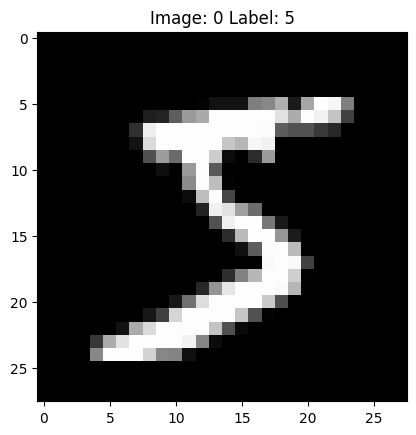

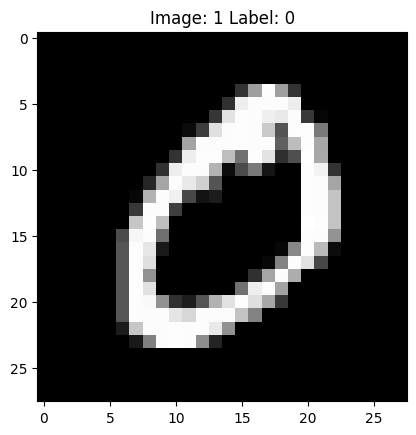

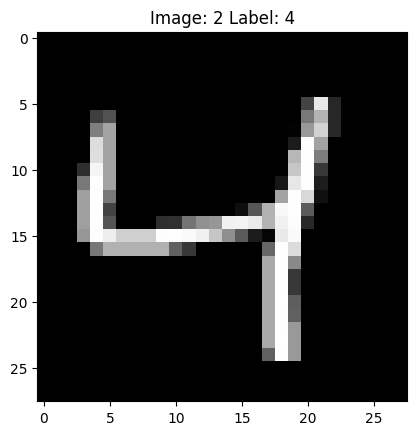

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(3):
    plt.figure(i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Image: " + str(i) + " Label: " + str(y_train[i]))



Prepare the data (reshape into vectors and encode the labels as one-hot vectors):


In [3]:
# Reshape and normalize the data
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0

# Encode the labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)
print(y_train[0], np.argmax(y_train[0]))
print(y_train[1], np.argmax(y_train[1]))
print(y_train[2], np.argmax(y_train[2]))


Train/test data shape: (60000, 784) (10000, 784)
Train/test labels shape: (60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4


Define a simple Multilayer Perceptron (MLP):

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()

# For the first layer we have to define the input dimensionality
model.add(Dense(64, activation='relu', input_dim=784))
# Add a second hidden layer
model.add(Dense(256, activation='relu'))
# Add an output layer (the number of neurons must match the number of classes)
model.add(Dense(10, activation='softmax'))

After defining the model we have to compile it!


In [9]:
# Select an optimizer
adam = Adam(learning_rate=0.0001)
# Select the loss function and metrics that should be monitored
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

We are now ready to train our model!!! 

*There are three different reporting levels: verbose=0 (no reporting), verbose=1 (progress bar), and verbose=2 (one line per epoch)*

In [10]:
model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50


2024-10-03 14:05:45.350470: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-10-03 14:05:45.475523: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 - 2s - 10ms/step - accuracy: 0.6499 - loss: 1.4378
Epoch 2/50
235/235 - 0s - 2ms/step - accuracy: 0.8727 - loss: 0.4935
Epoch 3/50
235/235 - 0s - 1ms/step - accuracy: 0.9032 - loss: 0.3507
Epoch 4/50
235/235 - 0s - 1ms/step - accuracy: 0.9158 - loss: 0.2985
Epoch 5/50
235/235 - 0s - 1ms/step - accuracy: 0.9234 - loss: 0.2676
Epoch 6/50
235/235 - 0s - 1ms/step - accuracy: 0.9294 - loss: 0.2460
Epoch 7/50
235/235 - 0s - 1ms/step - accuracy: 0.9347 - loss: 0.2286
Epoch 8/50
235/235 - 0s - 1ms/step - accuracy: 0.9380 - loss: 0.2147
Epoch 9/50
235/235 - 0s - 1ms/step - accuracy: 0.9411 - loss: 0.2031
Epoch 10/50
235/235 - 0s - 1ms/step - accuracy: 0.9441 - loss: 0.1922
Epoch 11/50
235/235 - 0s - 1ms/step - accuracy: 0.9469 - loss: 0.1831
Epoch 12/50
235/235 - 0s - 1ms/step - accuracy: 0.9493 - loss: 0.1744
Epoch 13/50
235/235 - 0s - 1ms/step - accuracy: 0.9506 - loss: 0.1665
Epoch 14/50
235/235 - 0s - 1ms/step - accuracy: 0.9534 - loss: 0.1589
Epoch 15/50
235/235 - 0s - 1ms/step - a

Let's see what we have got!

In [11]:
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

2024-10-03 14:06:02.304185: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-10-03 14:06:03.189298: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 372 bytes spill stores, 372 bytes spill loads

2024-10-03 14:06:03.471744: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 372 bytes spill stores, 372 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9857 - loss: 0.0533
Train accuracy:  [0.053244877606630325, 0.9851499795913696]
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9679 - loss: 0.0992
Test accuracy:  [0.09119419753551483, 0.9707000255584717]


Get the actual output of the network:

In [12]:
y_out = model.predict(x_train)
print(y_out[0], np.argmax(y_out[0]))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 686us/step
[3.5312667e-10 9.4468177e-08 2.5862144e-08 1.6317854e-02 3.2593809e-16
 9.8368198e-01 5.6974169e-12 3.3004703e-08 4.9880003e-11 3.1420832e-08] 5


Examine the behavior of the network a bit more in depth:

In [13]:
for i in range(10):
    print("Prediction order: ", np.argsort(y_out[i])[::-1], "True label: ", np.argmax(y_train[i]))

Prediction order:  [5 3 1 7 9 2 0 8 6 4] True label:  5
Prediction order:  [0 2 7 6 5 3 9 8 1 4] True label:  0
Prediction order:  [4 7 2 6 8 9 0 3 5 1] True label:  4
Prediction order:  [1 7 4 8 5 2 0 6 3 9] True label:  1
Prediction order:  [9 4 8 5 7 3 2 1 0 6] True label:  9
Prediction order:  [2 8 3 7 9 5 0 4 1 6] True label:  2
Prediction order:  [1 3 8 4 7 2 9 5 6 0] True label:  1
Prediction order:  [3 9 8 2 5 7 0 1 4 6] True label:  3
Prediction order:  [1 7 3 4 8 2 5 9 6 0] True label:  1
Prediction order:  [4 6 5 2 8 0 7 9 3 1] True label:  4
